# 2. Exploratory Data Analysis  <a id="eda"></a>

<a id="contents"></a>
## 2.1 Table of Contents

- [2 Exploratory Data Analysis](#eda)
    - [2.1 Contents](#contents)
    - [2.2 Introduction](#introduction)
    - [2.3 Imports](#imports)
    - [2.4 Explore the Data](#explore_data)

## 2.2 Introduction <a id="imports"></a>

The goal of this data science project is to develop a machine learning model capable of predicting stock prices for a selected set of publicly traded companies. By leveraging historical stock market data, along with relevant features such as financial indicators, market sentiment, and news headlines, the model aims to forecast future stock prices with a high degree of accuracy. The prediction of stock prices is of paramount importance to investors, traders, and financial institutions seeking to make informed decisions about buying, selling, or holding stocks. The developed model will provide valuable insights and actionable predictions that can potentially lead to improved investment strategies and better risk management in the dynamic and volatile stock market environment.

### Objective: 
Our aim is to examine the relationship between various stock prediction variables and past stock performance for 4 beauty and wellness stocks. We'll leverage visualizations to identify potential outliers and feature correlations, as well as generate statistical summaries, the nature of distributions for each variable, and how we might handle any data cleaning or transformation that's necessary. 

## 2.3 Imports <a id="imports"></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.dates as mdates
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
import csv
from tqdm.notebook import tqdm
import datetime as dt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error


2024-05-29 21:06:50.745636: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 2.4 Explore the Data <a id="explore_data"></a>

In [2]:
df = pd.read_csv('/Users/heatheradler/Documents/GitHub/Springboard/Springboard_Projects/Stock_Predictor_Capstone/Concated_Dataframe.csv')

In [3]:
df = df[df['stock_symbol'].isin(['EL','ULTA','COTY','ELF'])]

In [4]:
dt.datetime.strptime('2024-01-03', "%Y-%m-%d")

datetime.datetime(2024, 1, 3, 0, 0)

In [5]:
df.Date = pd.to_datetime(df.Date)

In [6]:
df.head(2)

,Unnamed: 0,stock_symbol,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,...,PSARl_0.02_0.2,PSARs_0.02_0.2,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,ISA_9,ISB_26,ITS_9,IKS_26,ICS_26
0,0,ULTA,2007-10-25,28.728543,34.612703,28.570313,29.490023,7487306,0.0,0.0,...,29.490023,29.490023,29.490023,29.490023,29.490023,29.490023,29.490023,29.490023,29.490023,26.008974
1,1,ULTA,2007-10-26,30.211945,32.615056,28.926331,31.645901,1625582,0.0,0.0,...,28.570313,29.882000,29.882000,29.882000,29.882000,29.882000,29.882000,29.882000,29.882000,25.563955


In [7]:
df.info()
df['stock_symbol'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15880 entries, 0 to 15879
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      15880 non-null  int64         
 1   stock_symbol    15880 non-null  object        
 2   Date            15880 non-null  datetime64[ns]
 3   Open            15880 non-null  float64       
 4   High            15880 non-null  float64       
 5   Low             15880 non-null  float64       
 6   Close           15880 non-null  float64       
 7   Volume          15880 non-null  int64         
 8   Dividends       15880 non-null  float64       
 9   Stock Splits    15880 non-null  float64       
 10  EMA_10          15880 non-null  float64       
 11  PSARl_0.02_0.2  15880 non-null  float64       
 12  PSARs_0.02_0.2  15880 non-null  float64       
 13  BBL_5_2.0       15880 non-null  float64       
 14  BBM_5_2.0       15880 non-null  float64       
 15  BB

stock_symbol
EL      7138
ULTA    4134
COTY    2717
ELF     1891
Name: count, dtype: int64

In [8]:
df.shape

(15880, 21)

**Observations**:

* The dataset includes an identifier (stock_symbol)and numerical variables (Date, Open, High, Low, Close, Colume, Dividends, and Stock Splits).
* There are no columns/rows with null values which indicated that there are no missing data in any records.

# Data Visualization
The next step is to visualize the data. We will use various types of plots to visualize the patterns and relationships in the data. 

## I. Summary Statistics

In [9]:
# Group by stock symbol and calculate summary statistics for the 'Close' column
summary_close = df.groupby('stock_symbol')['Close'].describe()

# Sort the summary statistics by the mean value of the 'Close' column
summary_close_sorted = summary_close.sort_values(by='mean', ascending=False)

# Display the summary statistics
summary_close_sorted

,count,mean,std,min,25%,50%,75%,max
stock_symbol,,,,,,,,
ULTA,4134.0,191.978151,145.238716,4.242528,69.284744,172.044998,287.695000,567.179993
EL,7138.0,69.444214,80.604213,6.062683,14.982805,22.644692,85.574041,360.912537
ELF,1891.0,37.899498,38.714920,7.300000,17.685000,25.190001,31.110001,217.399994
COTY,2717.0,13.212345,5.565438,2.650000,9.000000,12.300000,16.591005,28.150078


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15880 entries, 0 to 15879
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      15880 non-null  int64         
 1   stock_symbol    15880 non-null  object        
 2   Date            15880 non-null  datetime64[ns]
 3   Open            15880 non-null  float64       
 4   High            15880 non-null  float64       
 5   Low             15880 non-null  float64       
 6   Close           15880 non-null  float64       
 7   Volume          15880 non-null  int64         
 8   Dividends       15880 non-null  float64       
 9   Stock Splits    15880 non-null  float64       
 10  EMA_10          15880 non-null  float64       
 11  PSARl_0.02_0.2  15880 non-null  float64       
 12  PSARs_0.02_0.2  15880 non-null  float64       
 13  BBL_5_2.0       15880 non-null  float64       
 14  BBM_5_2.0       15880 non-null  float64       
 15  BB

## II. Closing Stock Price Over Time

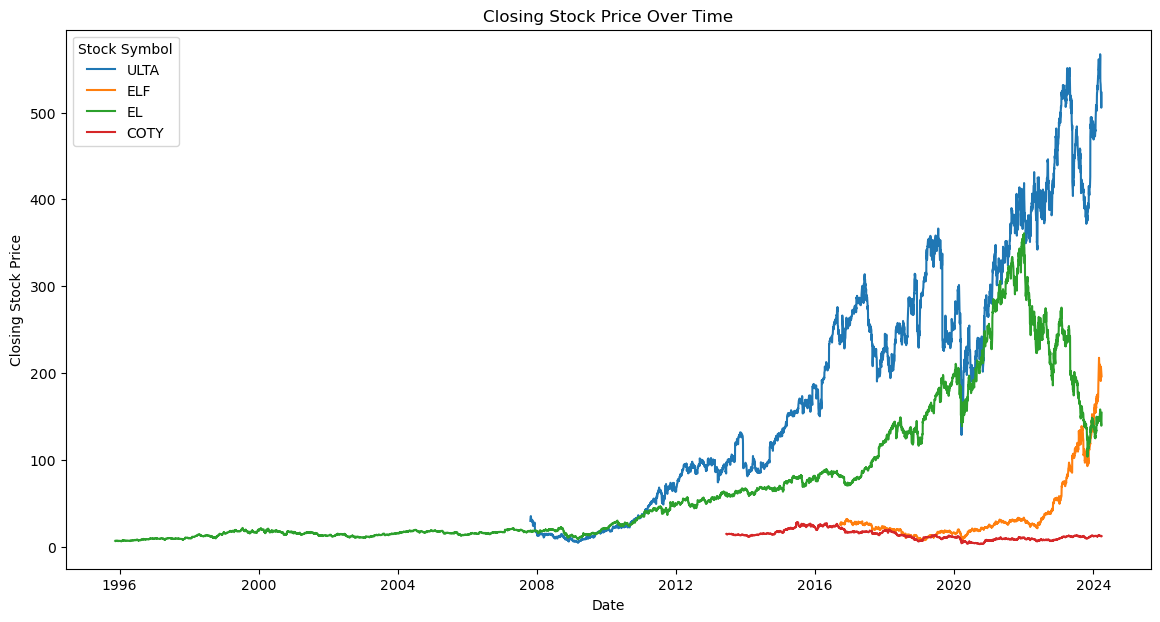

In [11]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Close', data=df, hue='stock_symbol')
plt.title('Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.legend(title='Stock Symbol')
plt.show()

### Observations: 
From the plot, we can see that the closing and opening stock prices have increased over time, with some fluctuations while  hitting highs in more recent years. 

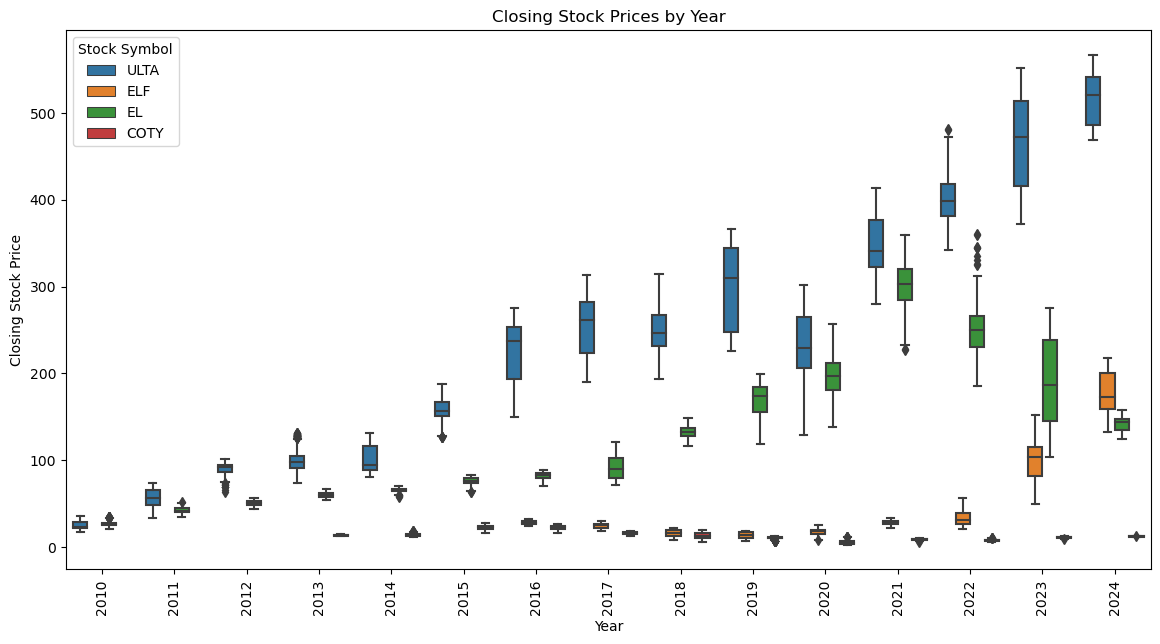

In [12]:
df['year'] = df['Date'].dt.year
df_filtered = df[df['year'] >= 2010]

plt.figure(figsize=(14, 7))
sns.boxplot(x='year', y='Close', data=df_filtered, hue='stock_symbol')
plt.title('Closing Stock Prices by Year')
plt.xlabel('Year')
plt.ylabel('Closing Stock Price')
plt.legend(title='Stock Symbol')
plt.xticks(rotation=90)
plt.show()

### Observations: 
The above plot data was filtered to only contain stock price data from 2010 onwards so that the data was more readable while still representing recent data. From this, we can see similar results to the line plot above. 

## III. Heatmap visualization
Next, we create a heatmap to visualize the correlation between the stock prices

In [13]:
cols = df.columns.values

In [14]:
cols= ['Date','Open', 'High', 'Low', 'Close', 
       'Volume', 'Dividends','Stock Splits', 'EMA_10','PSARl_0.02_0.2',
       'PSARs_0.02_0.2', 'BBL_5_2.0', 'BBM_5_2.0', 'BBU_5_2.0','ISA_9',
       'ISB_26','ITS_9', 'IKS_26', 'ICS_26']

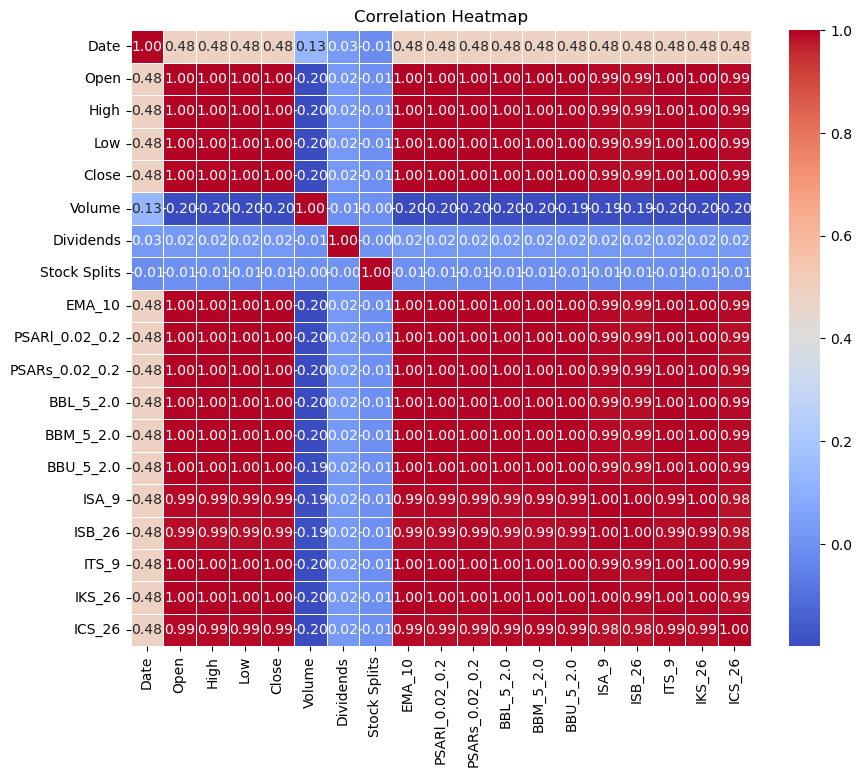

In [15]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

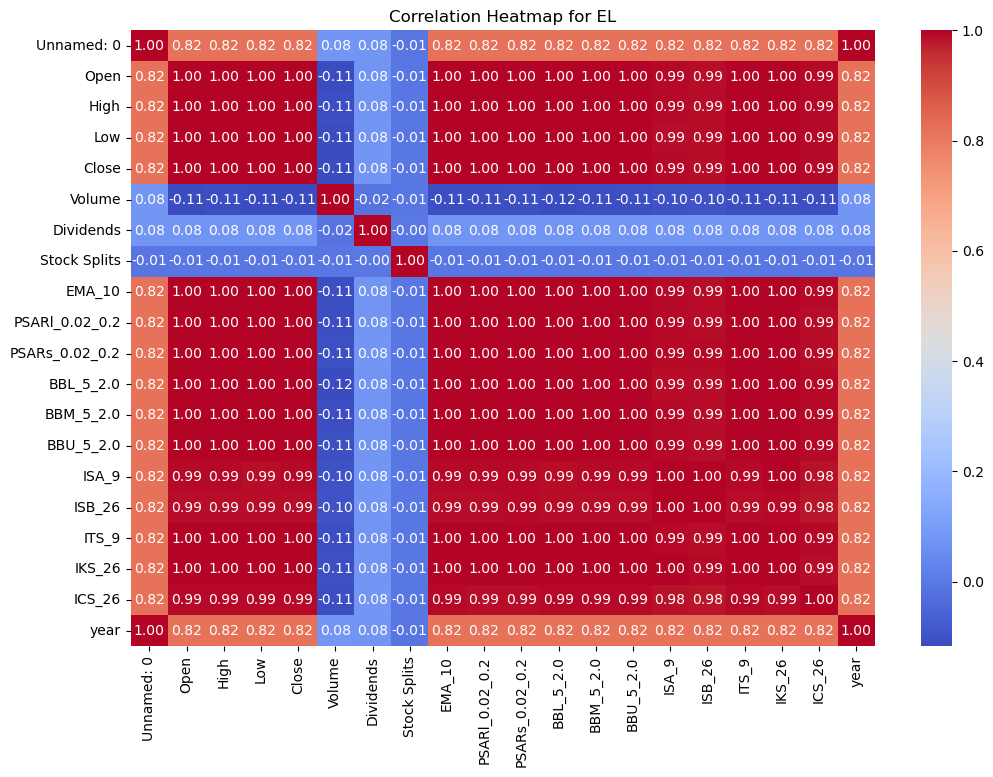

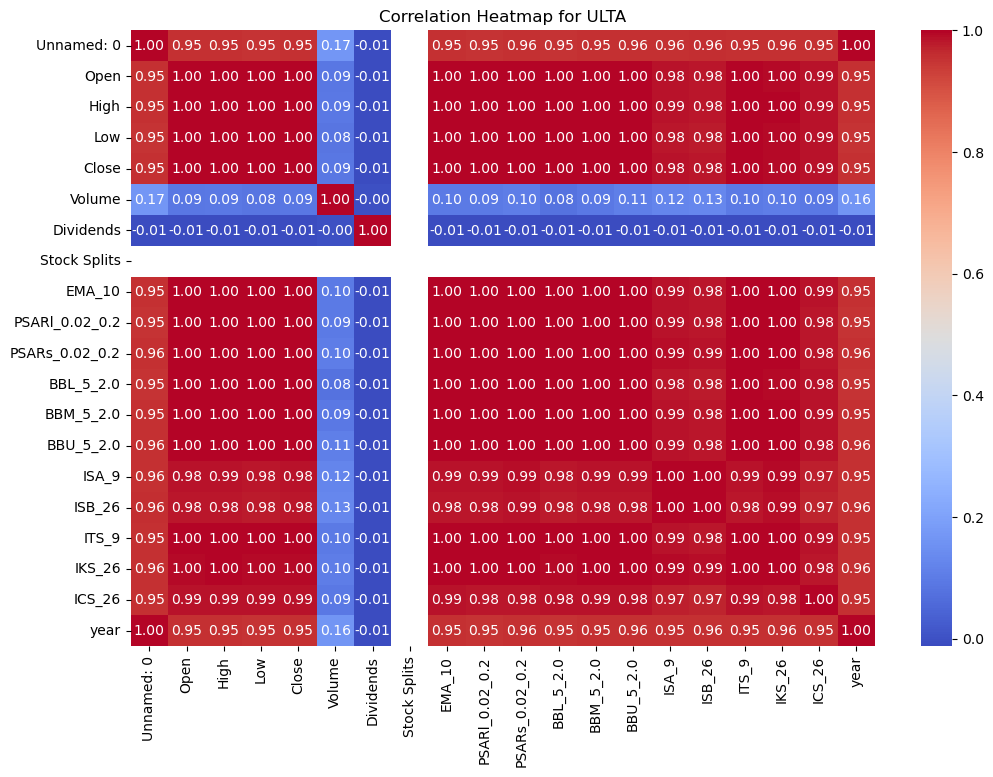

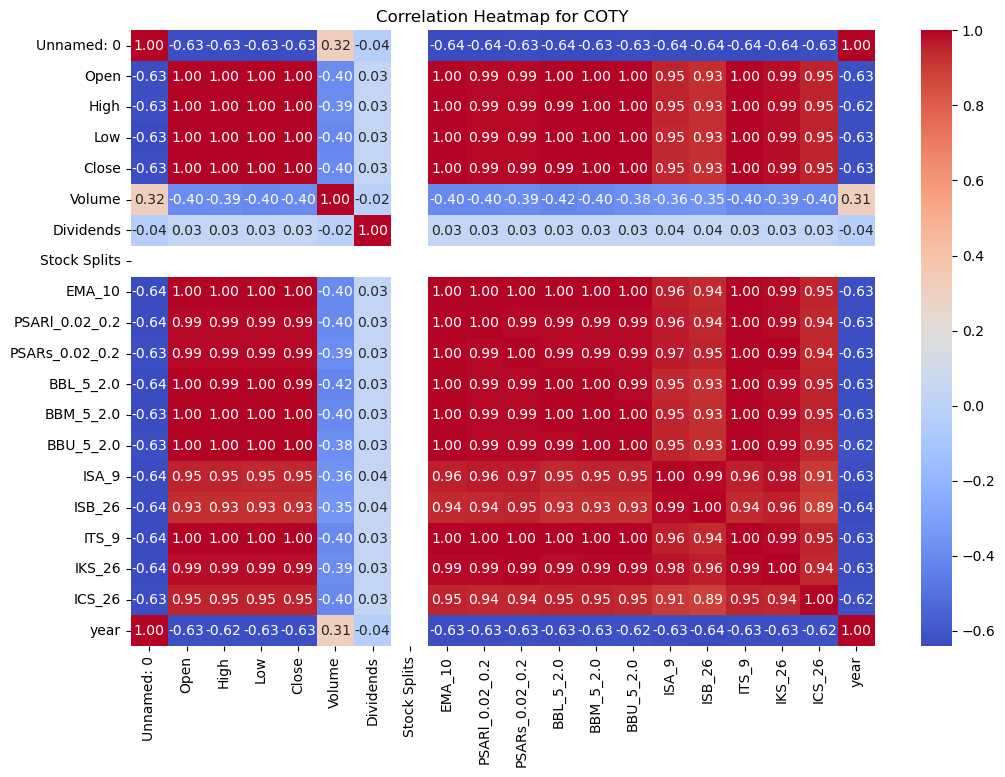

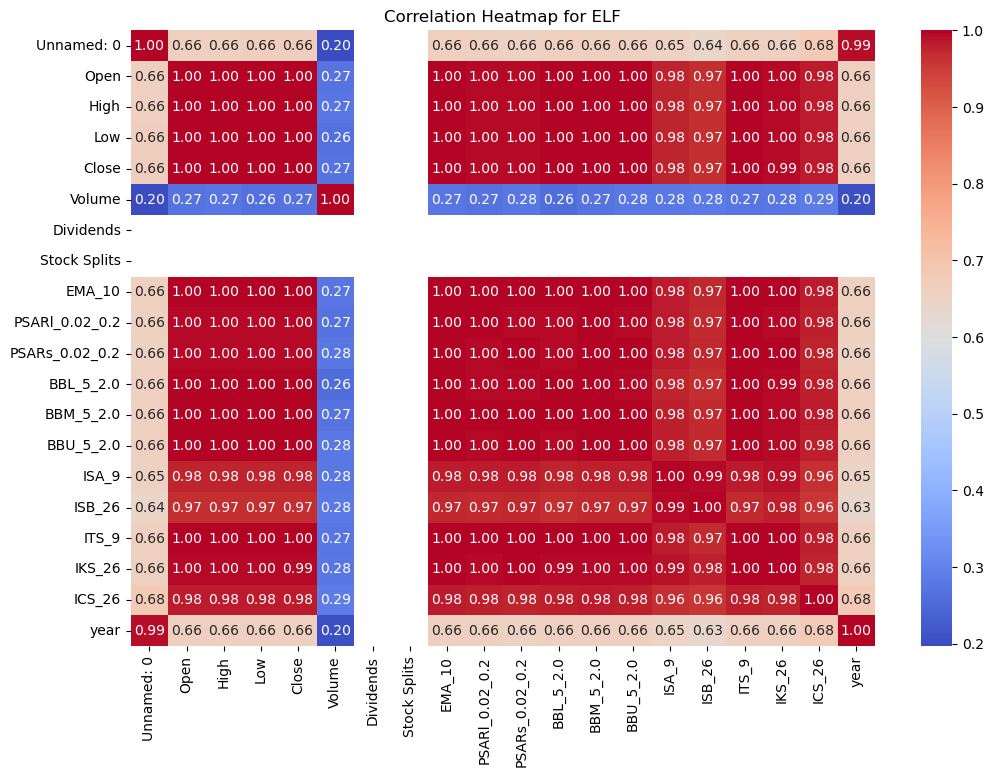

In [16]:
# Exclude non-numeric columns before calculating correlation
numeric_columns = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_columns]

# Create separate correlation heatmaps for each stock symbol
stock_symbol = ['EL', 'ULTA', 'COTY', 'ELF']
for symbol in stock_symbol:
    df_stock = df_numeric[df['stock_symbol'] == symbol]
    
    correlation_matrix = df_stock.corr()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title(f'Correlation Heatmap for {symbol}')
    plt.show()

### Observations:
From the heatmap, we can see that the opening and closing prices have a strong positive correlation, while the volume, dividends, and stock splits had much weaker positive correlations. As such, it is likely the dividends and stock split data will not be included as features in our model. 

## IV: Visualization of the Target Variable

The Target variable in this case is the closing stock price. The below charts show the frequency for which the closing stock price occurred and shows that ULTA and EL had the highest closing stock prices at a higher frequency. This suggests that these companies may have experienced relatively strong performance or investor confidence during this period.

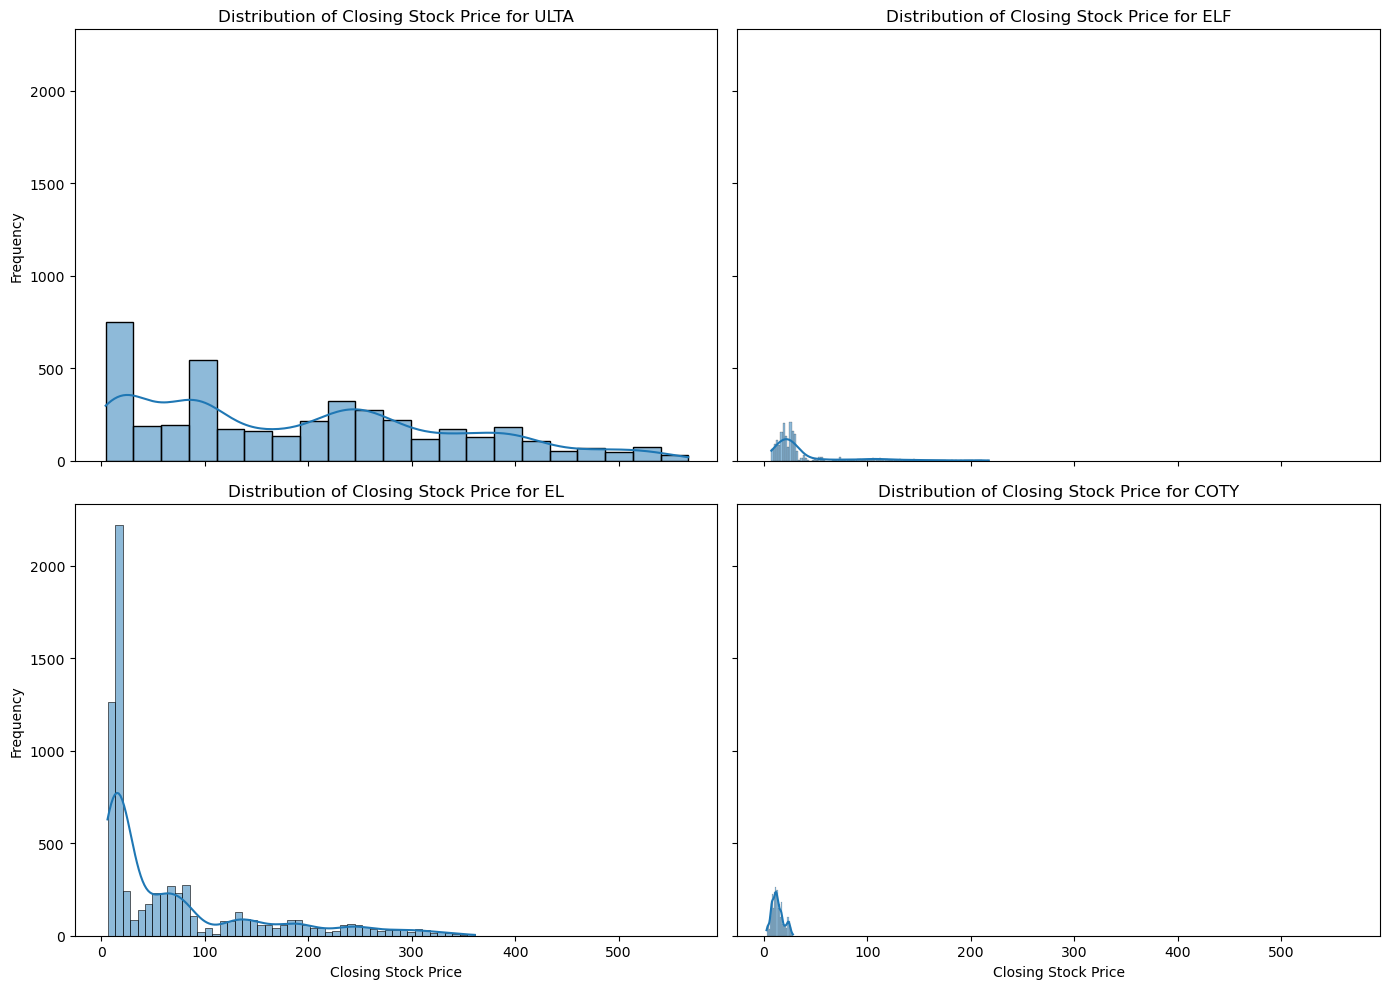

In [17]:
stock_symbols = df['stock_symbol'].unique()

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), sharex=True, sharey=True)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each stock symbol and create a separate plot
for i, symbol in enumerate(stock_symbols):
    sns.histplot(df[df['stock_symbol'] == symbol], x='Close', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of Closing Stock Price for {symbol}')
    axes[i].set_xlabel('Closing Stock Price')
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

### To visualize the daily returns, we created a line chart to show the percentage change in price from one day to the next.

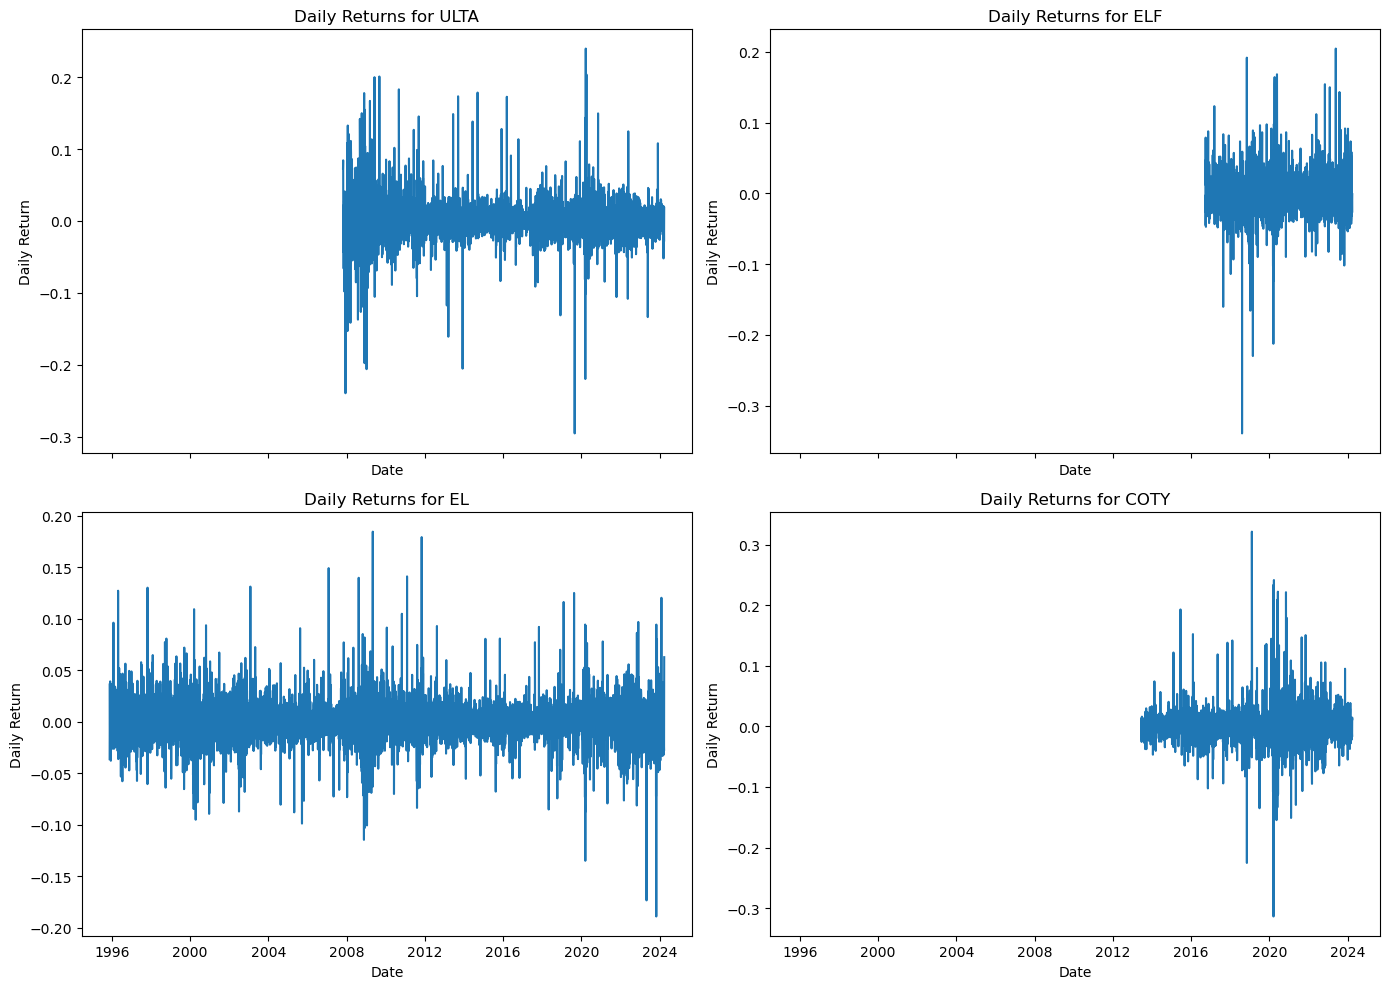

In [18]:

# Convert 'Date' column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Ensure the 'stock_symbol' column is a categorical type for better plotting
df['stock_symbol'] = df['stock_symbol'].astype('category')

# Get the unique stock symbols
stock_symbols = df['stock_symbol'].unique()

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), sharex=True)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each stock symbol and create a separate plot
for i, symbol in enumerate(stock_symbols):
    # Filter the DataFrame for the current stock symbol
    df_symbol = df[df['stock_symbol'] == symbol]
    
    # Calculate the daily returns for the current stock symbol
    daily_returns = df_symbol['Close'].pct_change()
    
    # Plot the daily returns for the current stock symbol
    axes[i].plot(df_symbol['Date'], daily_returns, label=f'{symbol} Daily Returns')
    
    # Set the title for the subplot to include the stock symbol
    axes[i].set_title(f'Daily Returns for {symbol}')
    
    # Set the x-axis label
    axes[i].set_xlabel('Date')
    
    # Set the y-axis label
    axes[i].set_ylabel('Daily Return')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

### Observations:
The above line charts show the percentage change in daily returns over time. The percent change in daily returns for each stock varied over time, which is normal. 

### We created a combination chart to visualize the stock prices with the volume traded

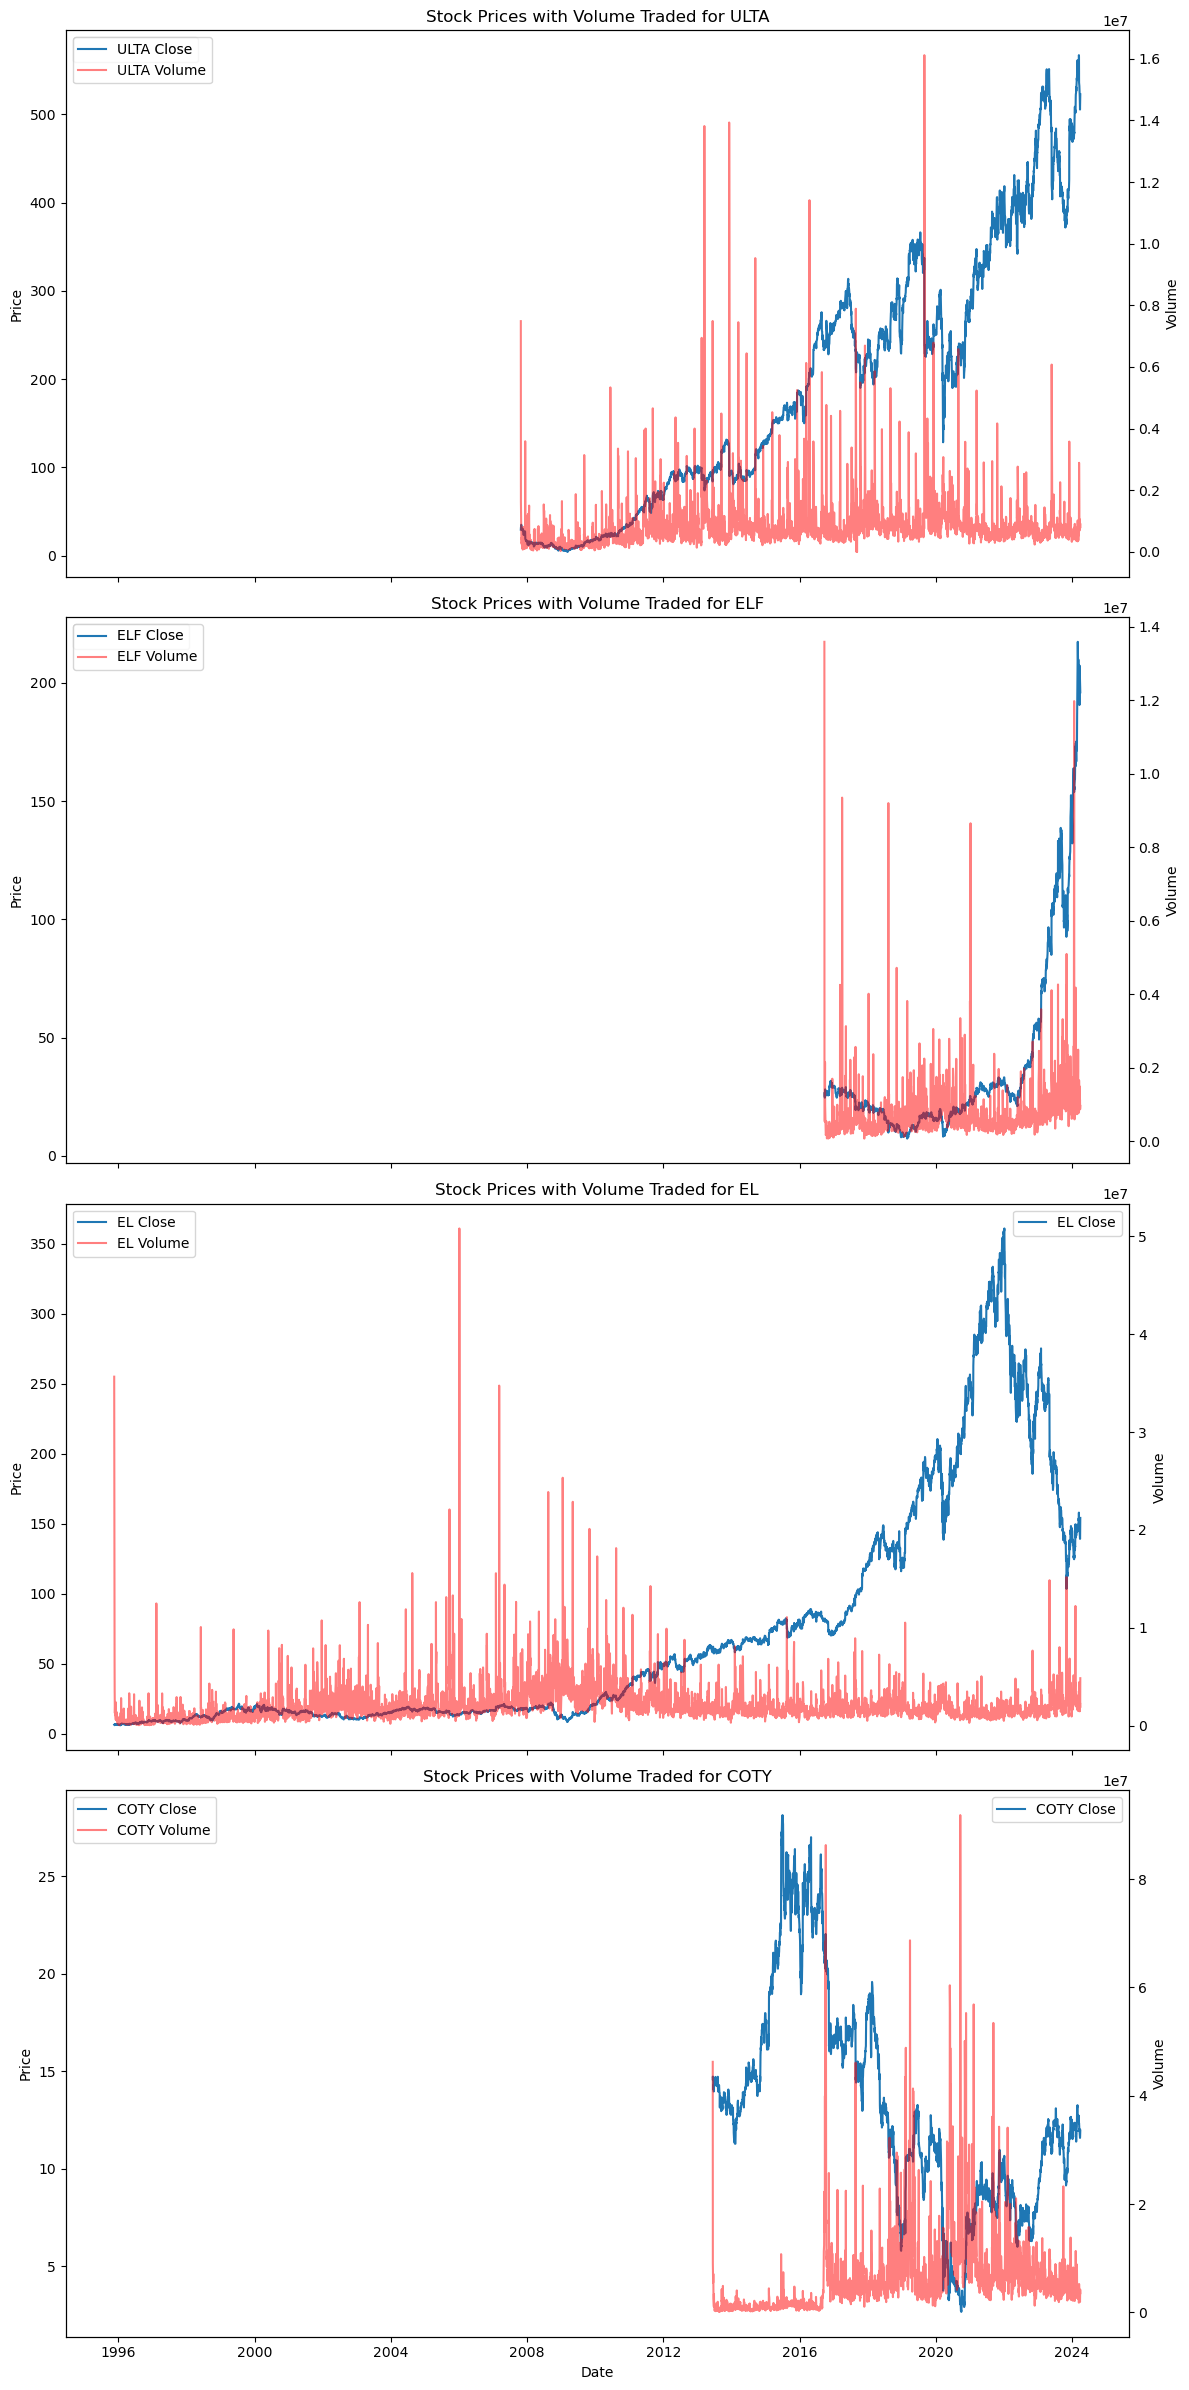

In [19]:
# Ensure the 'stock_symbol' column is a categorical type for better plotting
df['stock_symbol'] = df['stock_symbol'].astype('category')

# Get unique stock symbols
stock_symbols = df['stock_symbol'].unique()

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=len(stock_symbols), ncols=1, figsize=(12, 24), sharex=True)

# Plot closing prices and volumes for each stock symbol in separate subplots
for i, symbol in enumerate(stock_symbols):
    df_symbol = df[df['stock_symbol'] == symbol]
    
    # Plot closing price
    sns.lineplot(x='Date', y='Close', data=df_symbol, ax=axes[i], label=f'{symbol} Close')
    
    # Create secondary y-axis for volume
    ax2 = axes[i].twinx()
    sns.lineplot(x='Date', y='Volume', data=df_symbol, ax=ax2, label=f'{symbol} Volume', alpha=0.5, color='r')
    
    # Set the titles and labels for the subplot
    axes[i].set_title(f'Stock Prices with Volume Traded for {symbol}')
    axes[i].set_ylabel('Price')
    ax2.set_ylabel('Volume')
    
    # Combine legends from both y-axes
    lines, labels = axes[i].get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Set common labels
plt.xlabel('Year')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Observations
The above charts shows the following: 
1. ELF:ELF demonstrates a clear positive correlation between trading volume and closing price. When trading volume surges, the closing price tends to follow suit, suggesting heightened market interest.
2. EL: EL showcases an inverse relationship. Its highest closing prices align with periods of low trading volume.
3. ULTA: Similar to EL, ULTA's peak closing prices coincide with low trading volumes. This pattern reflects a potential market confidence booster during quieter trading periods.
4. COTY:
Opposite Directions: COTY's data reveals an inverse correlation, with low closing prices aligning with high trading volumes. This suggests significant sell-offs during periods of heightened activity.
